0.26


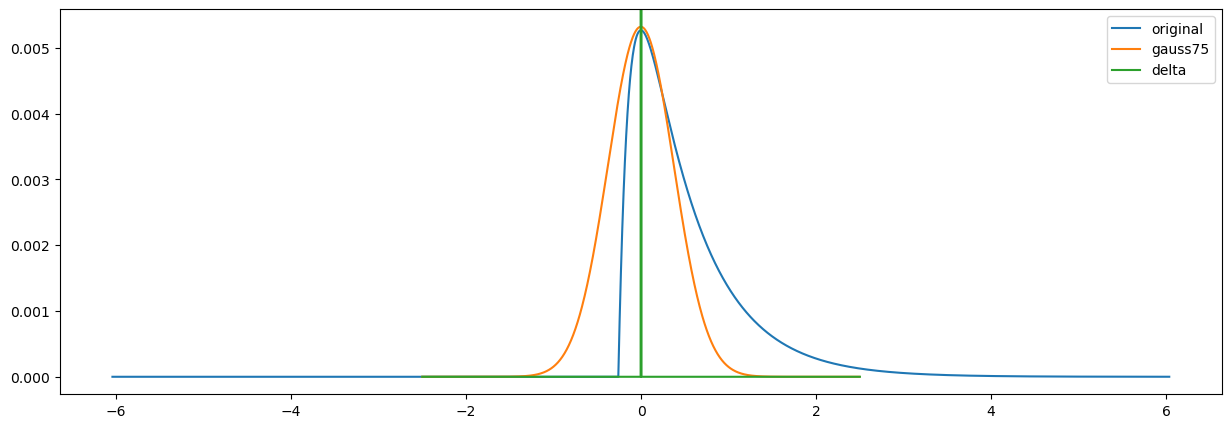

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian


def ca_kernel(tau_on, tau_off, f, mode):

    x = np.arange(0, 10*tau_off, 1 / f)
    
    ca_trace = lambda a, b, c: - np.exp(-a / b) + np.exp(-a / c)
    y = ca_trace(x, tau_on, tau_off)

    if mode == 'original':
        i_max = np.argmax(y)
        print(i_max/f)
        y = np.pad(y, pad_width=(len(y) - 2 * i_max, 0))
    elif mode == 'reversed':
        i_max = np.argmax(y)
        y = np.pad(y, pad_width=(len(y) - 2 * i_max, 0))
        y = y[::-1]
    elif mode == 'align0':
        y = np.pad(y, pad_width=(len(y), 0))
    elif mode == 'gauss75':
        y = gaussian(1000, 75)
    elif mode == 'delta':
        y = np.zeros(1001)
        y[500] = 1


    y = y / y.sum()

    return y
tau_on, tau_off = 0.13, 0.63 # https://elifesciences.org/articles/23496#s4
f = 200


x = lambda y: (np.arange(len(y)) - len(y) // 2) / f

fig, ax = plt.subplots(figsize=(15, 5))
y = ca_kernel(tau_on, tau_off, f, mode='original')
ax.plot(x(y), y, label='original')

# y = ca_kernel(tau_on, tau_off, f, mode='reversed')
# ax.plot(x(y), y, label='reversed')

# y = ca_kernel(tau_on, tau_off, f, mode='align0')
# ax.plot(x(y), y, label='align0')

y = ca_kernel(tau_on, tau_off, f, mode='gauss75')
ax.plot(x(y), y, label='gauss75')
ylims = ax.get_ylim()

y = ca_kernel(tau_on, tau_off, f, mode='delta')
ax.plot(x(y), y, label='delta')
ax.set_ylim(*ylims)

# y = ca_kernel(.23, .63, f, mode='original')
# ax.plot(x(y), y, label='on26off126')

ax.legend()



In [69]:
gaussian(1000, 0).sum()

c:\Users\spillern\Anaconda3\envs\imaging\lib\site-packages\scipy\signal\windows\_windows.py:1354: RuntimeWarning: divide by zero encountered in divide
  w = np.exp(-n ** 2 / sig2)


0.0

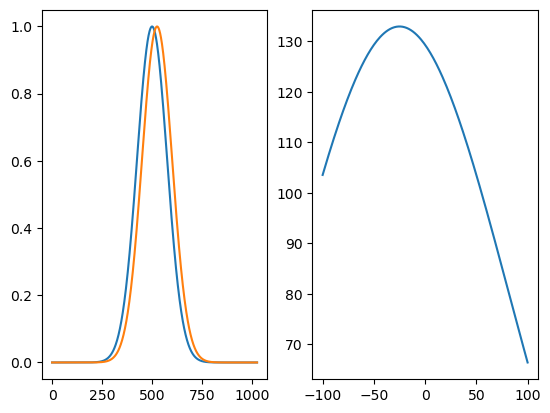

In [65]:
a = np.pad(gaussian(1000, 75), (0, 25))
b = np.pad(gaussian(1000, 75), (25, 0))
x = np.arange(len(a))



fig, axarr = plt.subplots(ncols=2)
ax = axarr[0]
ax.plot(x, a)
ax.plot(x, b)

ax = axarr[1]
b = np.pad(b, 100)
c = np.correlate(a, b, mode='valid')
x = np.arange(-100, 100 + 1)
ax.plot(x, c)  